## Implementation of normalized variance

https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/epdf/10.1002/jemt.20118

https://cellprofiler-manual.s3.amazonaws.com/CellProfiler-4.0.5/modules/measurement.html#:~:text=Measurements%20made%20by%20this%20module,-Blur%20metrics&text=FocusScore%3A%20A%20measure%20of%20the,scores%20correspond%20to%20lower%20bluriness. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Import csv from file to pandas dataframe
df = pd.read_csv('Image.csv')

wells = df.Metadata_Well.unique()

In [39]:
# Set up the plotting parameters
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
dpi = 300
figformat = 'pdf'

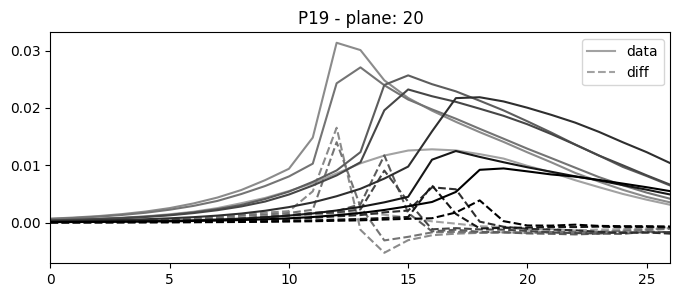

In [49]:
fig = plt.figure(figsize=(8, 3))

n = 4

tab20 = plt.get_cmap('binary', len(wells)+n)

for i, well in enumerate(wells):
    # Filter dataframe 
    df_subset = df[df["Metadata_Well"] == well]

    # convert to numpy array
    data = df_subset["ImageQuality_FocusScore_SYTO"].to_numpy()
    data = data[0:29]

    #  Plot the data
    plt.plot(data[2:29], c=tab20(i+n))

    # Take the derivative of the data
    data_diff = np.diff(data)

    plt.plot(data_diff[1:29], linestyle='dashed', c=tab20(i+n))


    # Find the max value and position of the derivative
    max_index = np.argmax(data_diff)
    max_index= max_index + 1


    # add legend
    plt.legend(['data', 'diff'])
    plt.title(str(well) + " - plane: " + str(max_index))
    
ax = plt.gca()
ax.set_xlim(0, 26)
    
plt.show()


fig.savefig(
    "DetectSpheroids.{}".format(figformat), dpi=dpi, bbox_inches="tight"
    )



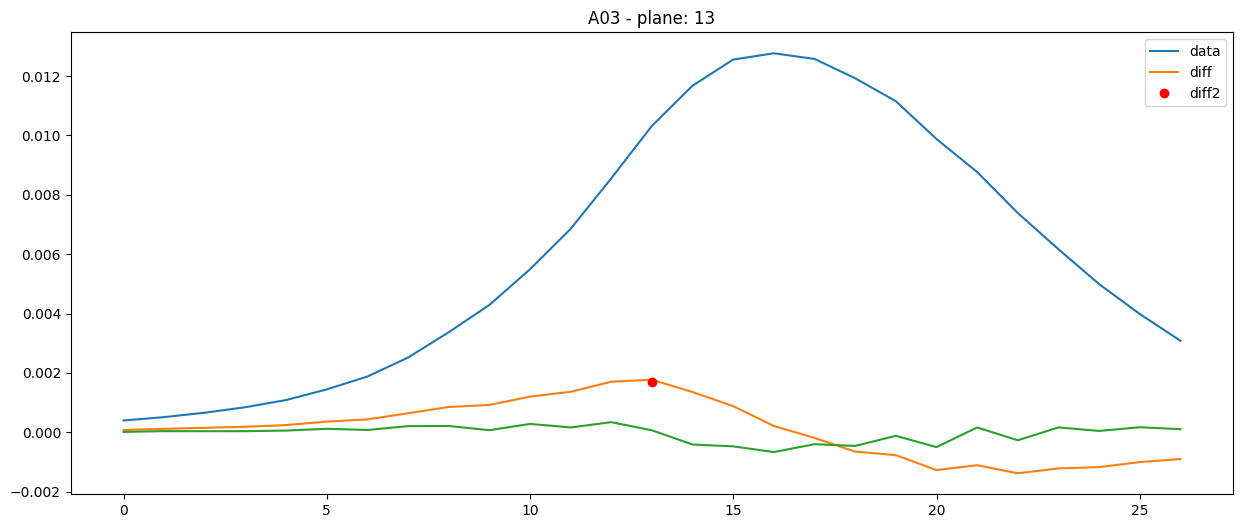

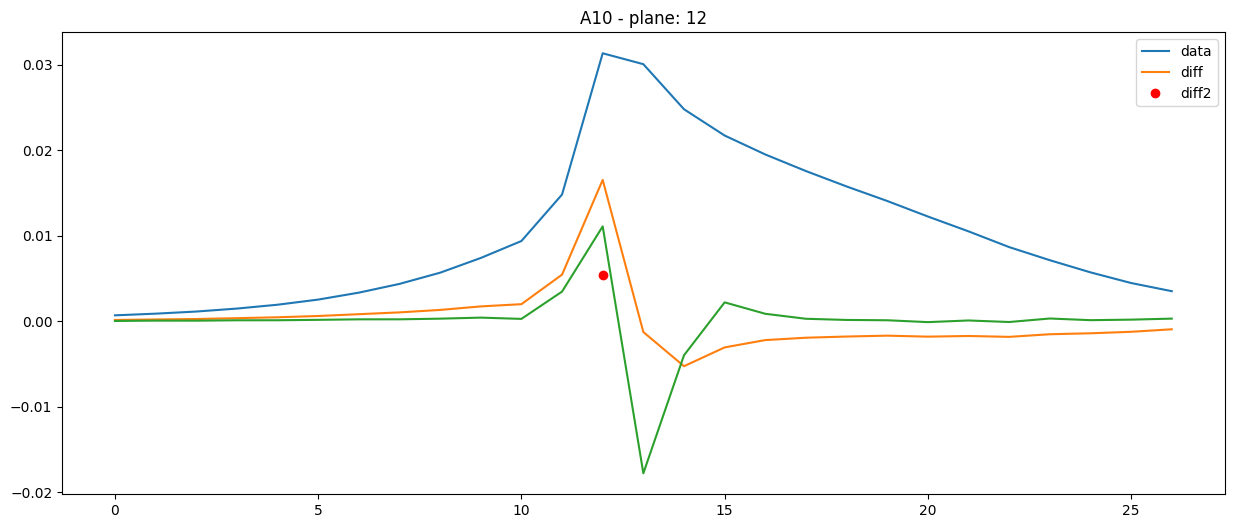

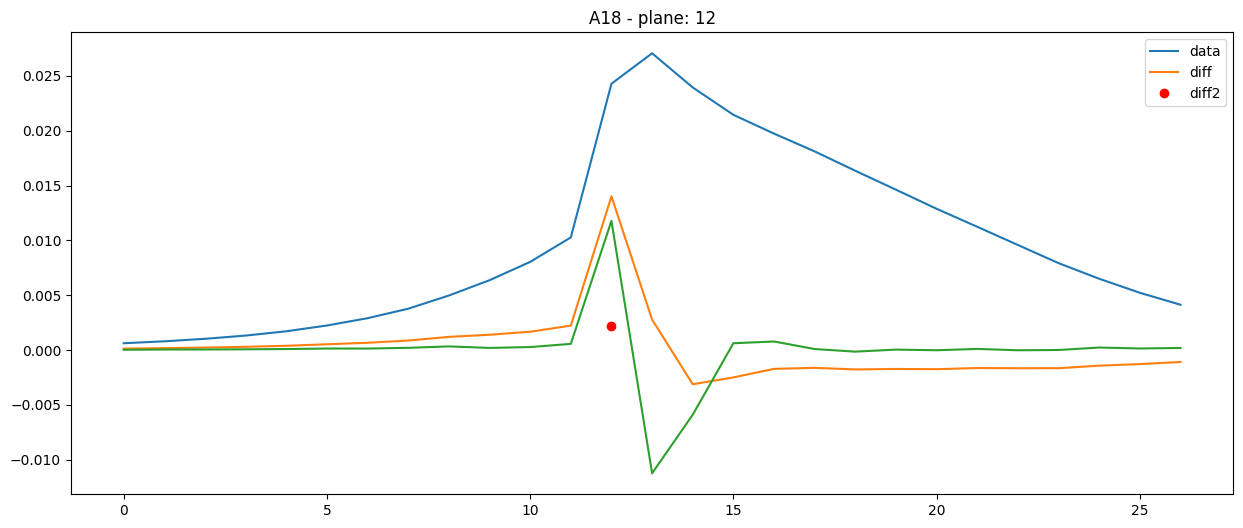

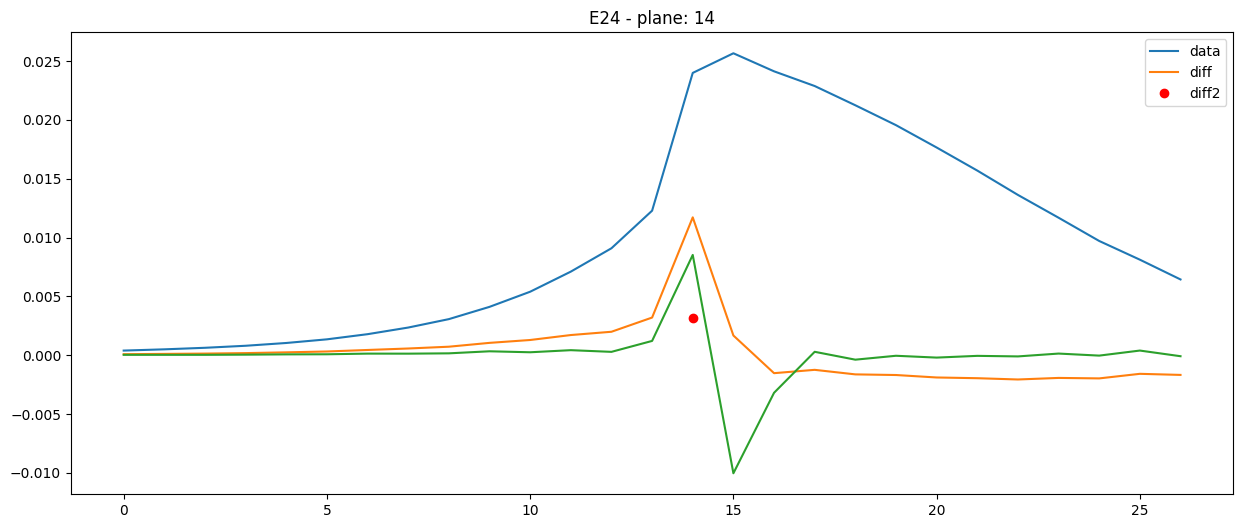

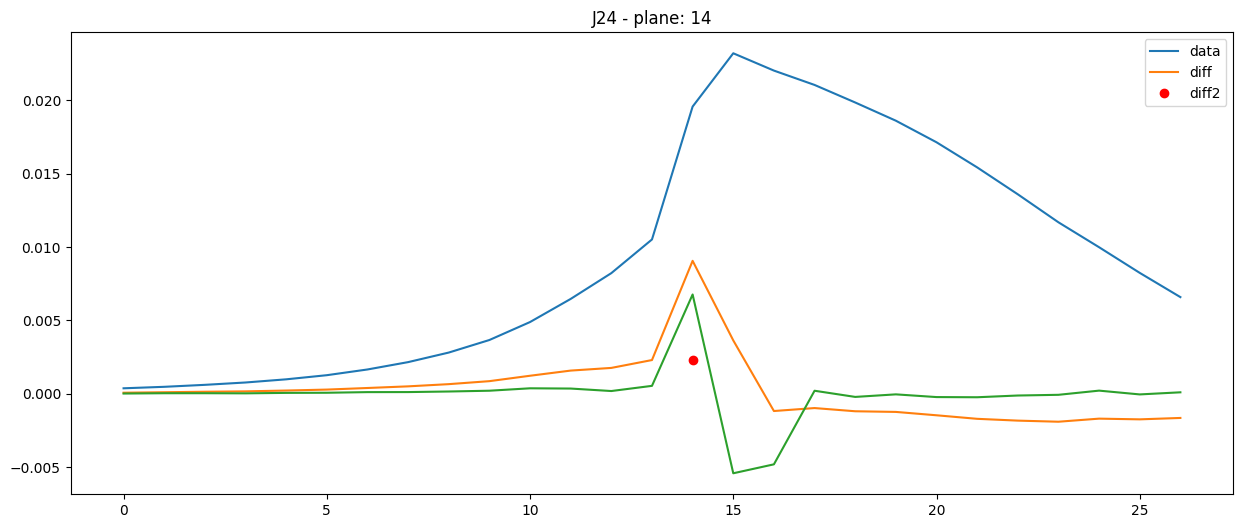

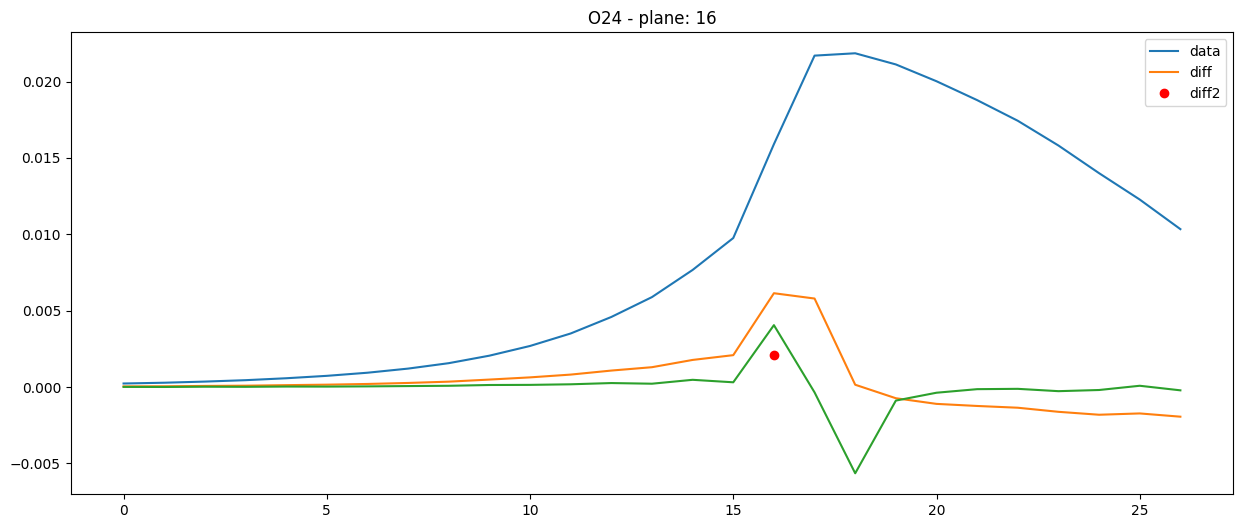

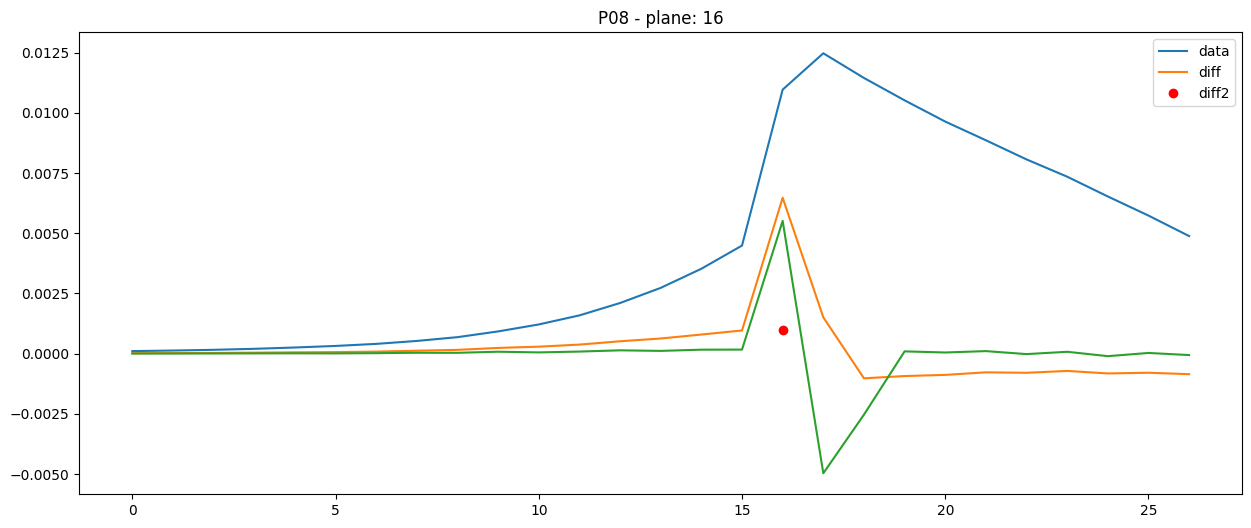

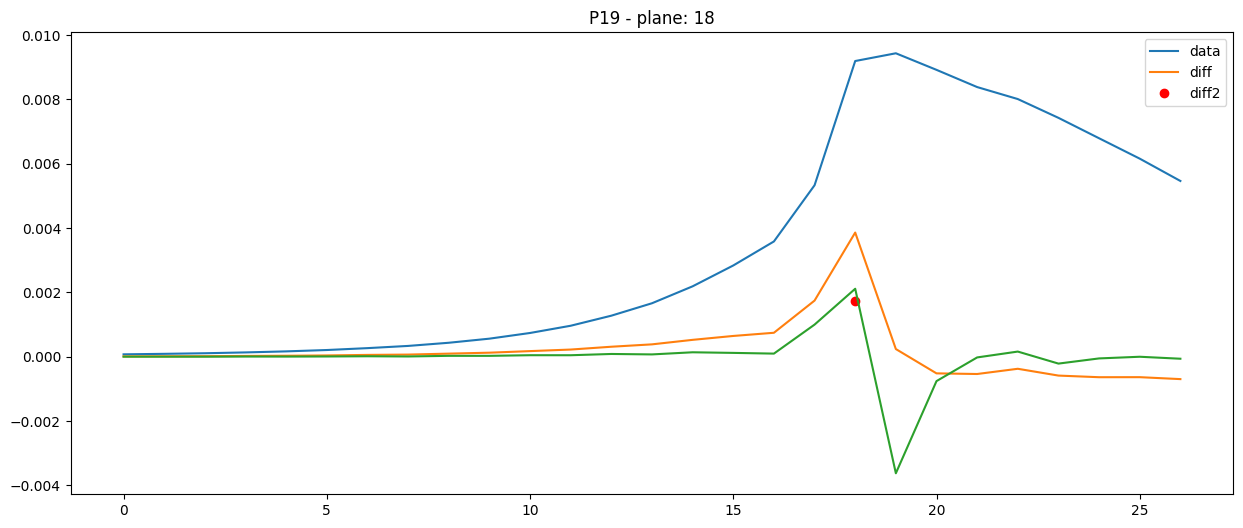

In [53]:


for well in wells:

    # Filter dataframe 
    df_subset = df[df["Metadata_Well"] == well]

    # convert to numpy array
    data = df_subset["ImageQuality_FocusScore_SYTO"].to_numpy()

    data = data[0:29]



    #  Plot the data
    fig = plt.figure(figsize=(15, 6))
    plt.plot(data[2:29])

    # Take the derivative of the data
    data_diff = np.diff(data)

    plt.plot(data_diff[1:29])


    # Find the max value and position of the derivative
    max_index = np.argmax(data_diff)
    max_index= max_index -1

    # Plot a red dot at the max value
    plt.plot(max_index, data_diff[max_index], 'ro')

    # Take the derivative of the data
    data_diff2 = np.diff(data_diff)

    plt.plot(data_diff2)


    # add legend
    plt.legend(['data', 'diff', 'diff2'])

    plt.title(str(well) + " - plane: " + str(max_index))

    plt.show()

## Try the same directly with the tiff images

In [9]:
# Get the package for images
from tifffile import imread


In [10]:
def normalized_variance(image):
    mean_val = np.mean(image)
    var_val = np.var(image)
    return var_val / mean_val

In [11]:
# This will read the Z-stack into a 3D NumPy array
zstack = imread("PointA18_0002_ChannelSYTO_Spheroid_Bounds_Seq0012.ome.tif")

print(zstack.shape)  # Should print (num_slices, height, width)


FileNotFoundError: [Errno 2] No such file or directory: '/share/data/analyses/christa/colopaint3D/spher_colo52_v1/PointA18_0002_ChannelSYTO_Spheroid_Bounds_Seq0012.ome.tif'

In [27]:
# Compute the normalized variance for each slice

nv = np.zeros(zstack.shape[0])
var = np.zeros(zstack.shape[0])
mean = np.zeros(zstack.shape[0])
for i in range(zstack.shape[0]):
    nv[i] = normalized_variance(zstack[i, :, :])
    var[i] = np.var(zstack[i, :, :])
    mean[i] = np.mean(zstack[i, :, :])


In [13]:
well = 'A18'

Text(0.5, 1.0, 'A18 - plane: 14')

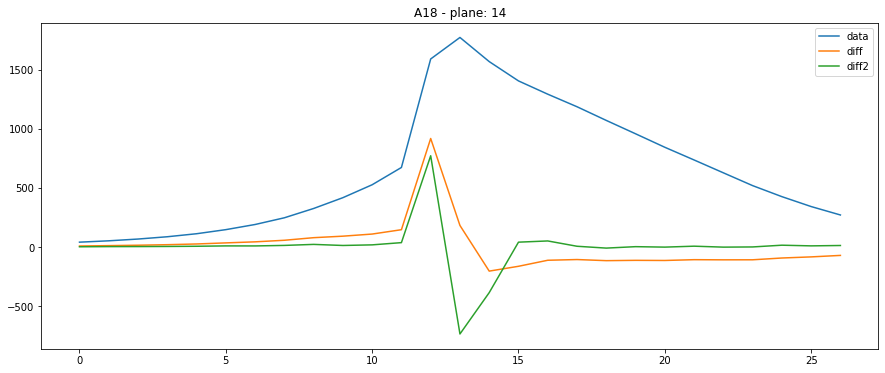

In [14]:
#  Plot the data
fig = plt.figure(figsize=(15, 6))
plt.plot(nv[2:29])

# Take the derivative of the data
data_diff = np.diff(nv)

plt.plot(data_diff[1:29])


# Find the max value and position of the derivative
max_index = np.argmax(data_diff)
max_index= max_index + 1


# Take the derivative of the data
data_diff2 = np.diff(data_diff)

plt.plot(data_diff2)


# add legend
plt.legend(['data', 'diff', 'diff2'])

plt.title(str(well) + " - plane: " + str(max_index))



In [24]:
# Concatenate two arrays on the second axis

data_diff2 = np.concatenate(([0], data_diff))

A = np.concatenate(([nv], [data_diff2]))

A = np.transpose(A)